In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv("train.csv")

In [2]:
print(len(df))
df.head()

240000


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


## NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT

#### NUMERICOS QUE SOLO SON CERO O UNO

In [3]:
df['usosmultiples'] = df['usosmultiples'].astype('bool')
df['piscina'] = df['piscina'].astype('bool')
df['gimnasio'] = df['gimnasio'].astype('bool')
df['escuelascercanas'] = df['escuelascercanas'].astype('bool')
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype('bool')

#### FECHA DE PUBLICACION A DATETIME

In [4]:
df['fecha'] = pd.to_datetime(df['fecha'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [5]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

#### Paso el precio a millones de pesos

In [6]:
df['precio'] = df.precio/1000000
df.head()
df['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

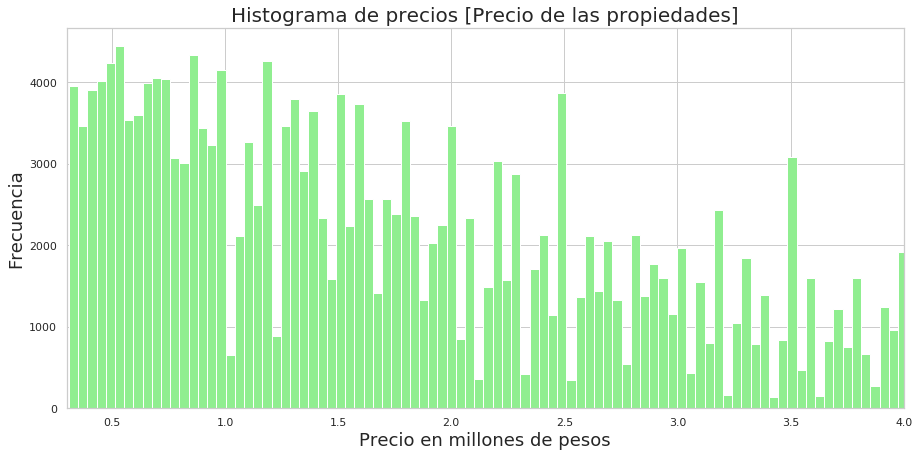

In [18]:
g = df["precio"].plot.hist(bins=300, color='lightgreen', figsize=(15, 7))
g.set_title("Histograma de precios [Precio de las propiedades]", fontsize=20)
g.set_xlabel("Precio en millones de pesos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)
plt.xlim(0.3, 4)
plt.savefig('FrecPrec.png')

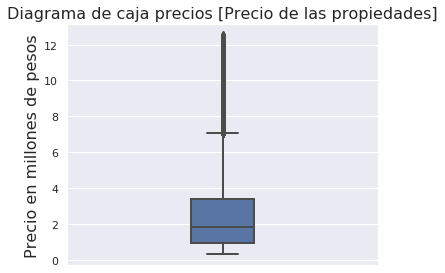

In [80]:
sns.boxplot( y=df["precio"], width=0.2, linewidth=2)

plt.title('Diagrama de caja precios [Precio de las propiedades]', fontsize=16)
plt.ylabel('Precio en millones de pesos', fontsize=16)

plt.tight_layout()

plt.savefig("BoxPrec.png")

# Precio promedio por tipo de propiedad

In [54]:
prop = df.dropna(subset=['tipodepropiedad'])
propTop4 = prop.groupby('tipodepropiedad').filter(lambda x : len(x)>5000)
prop = propTop4

In [55]:
print(len(prop))
prop.head()

228300


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2.273
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3.600
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1.200
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,0.650
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1.150


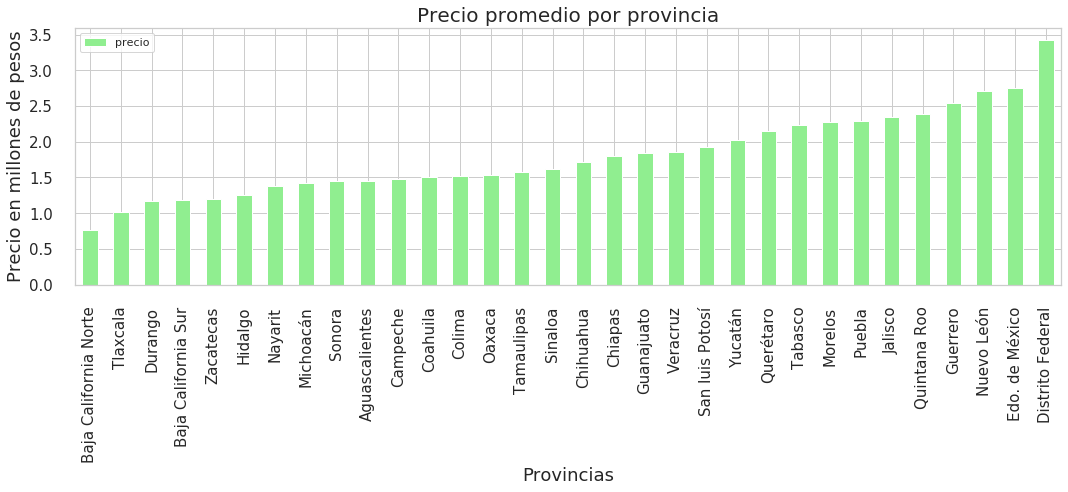

In [56]:
ax = prop.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values(by=['precio'])\
    .plot(kind='bar', figsize=(15, 7), rot='vertical', color='lightgreen');
ax.set_xlabel("Provincias", fontsize=18)
ax.set_ylabel("Precio en millones de pesos", fontsize=18)
ax.set_title("Precio promedio por provincia", fontsize=20)
ax.tick_params(direction='out', length=18, width=18, labelsize=15)
plt.tight_layout()
plt.savefig('PrecioVsProb.png')

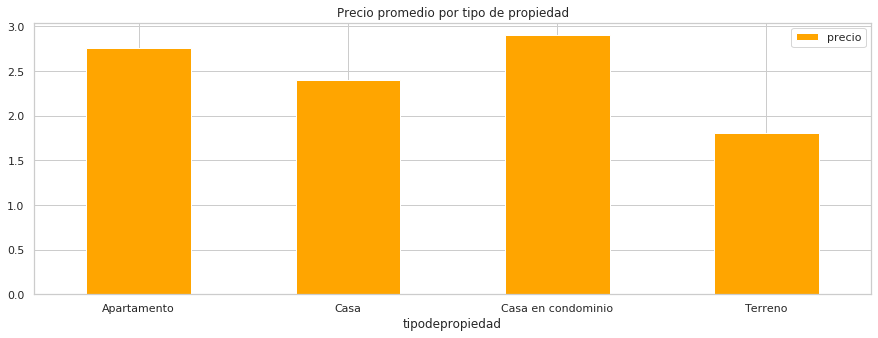

In [57]:
propTop4.groupby('tipodepropiedad').agg({'precio': 'mean'})\
    .plot(kind='bar', figsize=(15, 5), rot=0, title="Precio promedio por tipo de propiedad", color='orange');

### En Mexico DF Y Baja California Norte

In [58]:
tasaTipo = propTop4.groupby(['tipodepropiedad', 'provincia']).agg({'precio': 'mean'})
tasaTipo = tasaTipo.unstack(fill_value=0)
tasaTipo

precio                                            \
provincia          Aguascalientes Baja California Norte Baja California Sur   
tipodepropiedad                                                               
Apartamento              1.983935              1.031354            1.387354   
Casa                     1.411556              0.749331            1.165894   
Casa en condominio       1.842735              0.705129            2.007090   
Terreno                  0.980819              0.532430            0.981975   

                                                                      \
provincia           Campeche   Chiapas Chihuahua  Coahuila    Colima   
tipodepropiedad                                                        
Apartamento         2.755000  0.952988  2.348672  1.366500  2.492713   
Casa                1.460351  1.914576  1.750869  1.528582  1.416699   
Casa en condominio  1.827182  1.653721  0.704722  1.187650  2.345725   
Terreno             1.093561  1.232126  0.997731  1.035559  0.666627   

                                               ...               \
provincia          Distrito Federal   Durango  ... Quintana Roo   
tipodepropiedad                                ...                
Apartamento                2.919084  1.052362  ...     2.711399   
Casa                       4.037017  1.185172  ...     2.333655   
Casa en condominio         4.811713  1.733281  ...     2.508516   
Terreno                    4.066719  0.650260  ...     1.183473   

                                                                             \
provincia          San luis Potosí   Sinaloa    Sonora   Tabasco Tamaulipas   
tipodepropiedad                                                               
Apartamento               1.671470  1.729476  1.685532  1.785455   1.017654   
Casa                      2.032427  1.643923  1.459925  2.343634   1.686433   
Casa en condominio        2.266716  1.800260  0.900301  3.365778   1.282397   
Terreno                   1.360701  0.961073  0.852976  1.400985   1.005246   

                                                            
provincia           Tlaxcala  Veracruz   Yucatán Zacatecas  
tipodepropiedad                                             
Apartamento         0.477258  1.940036  2.336429  0.480000  
Casa                1.044962  1.921550  1.992796  1.229582  
Casa en condominio  0.633147  1.488363  2.633705  0.884333  
Terreno             1.360011  1.066838  1.280037  1.038187  

[4 rows x 32 columns]

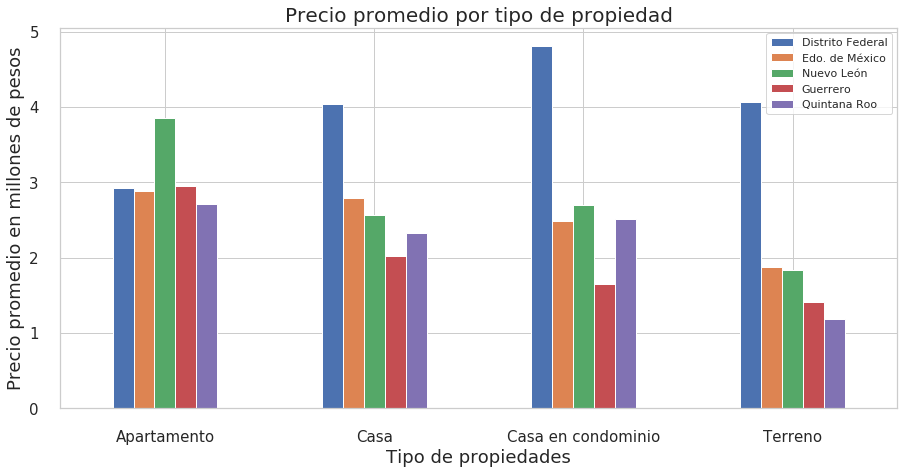

In [59]:
pres_df = tasaTipo.precio["Distrito Federal"].tolist()
pres_edoMe = tasaTipo.precio['Edo. de México'].tolist()
pres_nueLeo = tasaTipo.precio['Nuevo León'].tolist()
pres_Guer = tasaTipo.precio['Guerrero'].tolist()
pres_Quintana_Roo = tasaTipo.precio['Quintana Roo'].tolist()

#Districto Federal; Edo. de México; Nuevo León; Guerrero; Quintana Roo

index = tasaTipo.index


presCat = pd.DataFrame({'Distrito Federal': pres_df,
                        'Edo. de México': pres_edoMe,
                        'Nuevo León': pres_nueLeo,
                        'Guerrero': pres_Guer,
                        'Quintana Roo': pres_Quintana_Roo}, index=index)
ax = presCat.plot.bar(rot=0, figsize=(15, 7))
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)
ax.set_xlabel("Tipo de propiedades", fontsize=18)
ax.set_title("Precio promedio por tipo de propiedad", fontsize=20)
ax.tick_params(direction='out', length=18, width=18, labelsize=15)
plt.savefig('PreciotipoProbTop5.png')

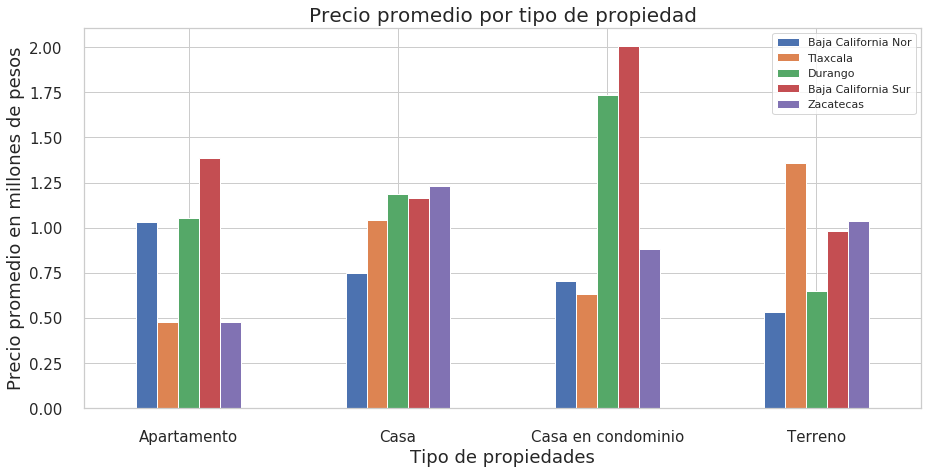

In [60]:
pres_BajaCalNor = tasaTipo.precio["Baja California Norte"].tolist()
pres_Tlax = tasaTipo.precio['Tlaxcala'].tolist()
pres_Durabgo = tasaTipo.precio['Durango'].tolist()
pres_BajaCalSur = tasaTipo.precio['Baja California Sur'].tolist()
pres_Zacatecas = tasaTipo.precio['Zacatecas'].tolist()

#Baja California Norte; Tlaxcala; Durango; Baja California Sur; Zacatecas

index = tasaTipo.index


presCat = pd.DataFrame({'Baja California Nor': pres_BajaCalNor,
                        'Tlaxcala': pres_Tlax,
                        'Durango': pres_Durabgo,
                        'Baja California Sur': pres_BajaCalSur,
                        'Zacatecas': pres_Zacatecas}, index=index)
ax = presCat.plot.bar(rot=0, figsize=(15, 7))
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)
ax.set_xlabel("Tipo de propiedades", fontsize=18)
ax.tick_params(direction='out', length=18, width=18, labelsize=15)
ax.set_title("Precio promedio por tipo de propiedad", fontsize=20)
plt.savefig('PreciotipoProInf5.png')

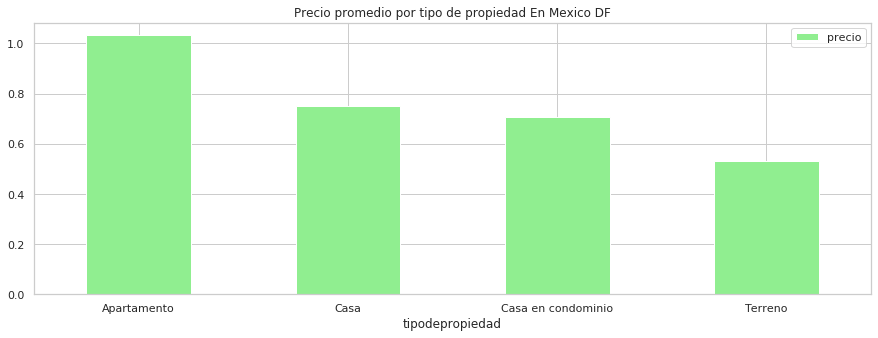

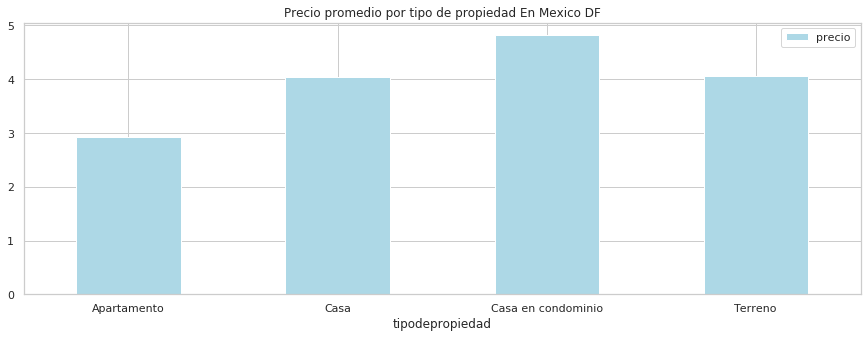

In [61]:
prop_df = prop[prop['provincia'] == 'Distrito Federal']
prop_bajCal = prop[prop['provincia'] == 'Baja California Norte']

prop_bajCal.groupby('tipodepropiedad').agg({'precio': 'mean'})\
    .plot(kind='bar', figsize=(15, 5), rot=0, title="Precio promedio por tipo de propiedad En Mexico DF", color='lightgreen');

prop_df.groupby('tipodepropiedad').agg({'precio': 'mean'})\
    .plot(kind='bar', figsize=(15, 5), rot=0, title="Precio promedio por tipo de propiedad En Mexico DF", color='lightblue');

In [62]:
labels = prop["tipodepropiedad"].tolist()
labels = list( dict.fromkeys(labels) )
labels.sort()
labels

['Apartamento', 'Casa', 'Casa en condominio', 'Terreno']

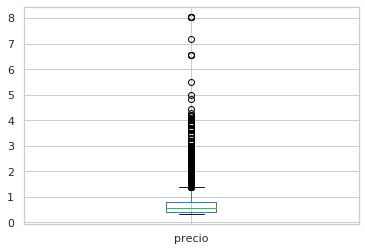

In [63]:
prop_bajCal['precio'].plot(kind='box');

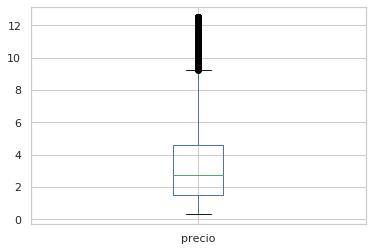

In [64]:
prop_df['precio'].plot(kind='box');

In [65]:
tasaTipo

precio                                            \
provincia          Aguascalientes Baja California Norte Baja California Sur   
tipodepropiedad                                                               
Apartamento              1.983935              1.031354            1.387354   
Casa                     1.411556              0.749331            1.165894   
Casa en condominio       1.842735              0.705129            2.007090   
Terreno                  0.980819              0.532430            0.981975   

                                                                      \
provincia           Campeche   Chiapas Chihuahua  Coahuila    Colima   
tipodepropiedad                                                        
Apartamento         2.755000  0.952988  2.348672  1.366500  2.492713   
Casa                1.460351  1.914576  1.750869  1.528582  1.416699   
Casa en condominio  1.827182  1.653721  0.704722  1.187650  2.345725   
Terreno             1.093561  1.232126  0.997731  1.035559  0.666627   

                                               ...               \
provincia          Distrito Federal   Durango  ... Quintana Roo   
tipodepropiedad                                ...                
Apartamento                2.919084  1.052362  ...     2.711399   
Casa                       4.037017  1.185172  ...     2.333655   
Casa en condominio         4.811713  1.733281  ...     2.508516   
Terreno                    4.066719  0.650260  ...     1.183473   

                                                                             \
provincia          San luis Potosí   Sinaloa    Sonora   Tabasco Tamaulipas   
tipodepropiedad                                                               
Apartamento               1.671470  1.729476  1.685532  1.785455   1.017654   
Casa                      2.032427  1.643923  1.459925  2.343634   1.686433   
Casa en condominio        2.266716  1.800260  0.900301  3.365778   1.282397   
Terreno                   1.360701  0.961073  0.852976  1.400985   1.005246   

                                                            
provincia           Tlaxcala  Veracruz   Yucatán Zacatecas  
tipodepropiedad                                             
Apartamento         0.477258  1.940036  2.336429  0.480000  
Casa                1.044962  1.921550  1.992796  1.229582  
Casa en condominio  0.633147  1.488363  2.633705  0.884333  
Terreno             1.360011  1.066838  1.280037  1.038187  

[4 rows x 32 columns]

In [66]:
tasaTipo.precio["Distrito Federal"]

tipodepropiedad
Apartamento           2.919084
Casa                  4.037017
Casa en condominio    4.811713
Terreno               4.066719
Name: Distrito Federal, dtype: float64

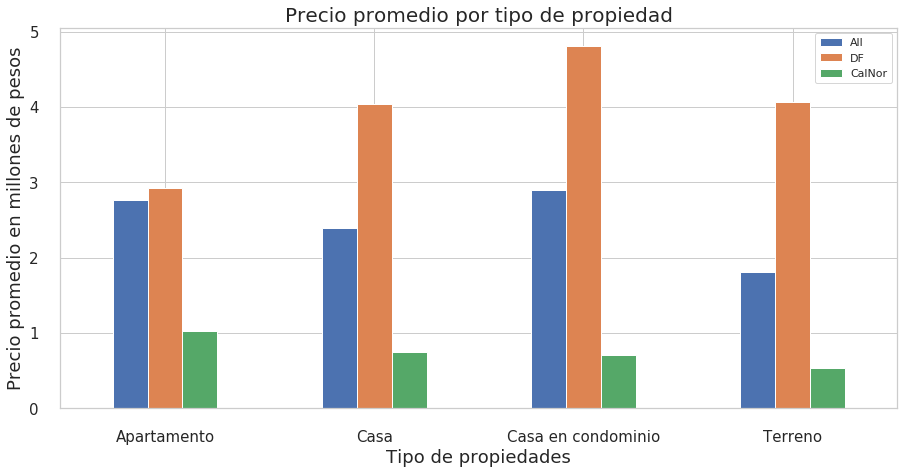

In [67]:
index = tasaTipo.index

pres_all = propTop4.groupby('tipodepropiedad').agg({'precio': 'mean'})
pres_all = pres_all['precio'].tolist()
pres_df = tasaTipo.precio["Distrito Federal"].tolist()
pres_CalNor = tasaTipo.precio["Baja California Norte"].tolist()

presCat = pd.DataFrame({'All': pres_all,
                        'DF': pres_df,
                        'CalNor': pres_CalNor}, index=index)
ax = presCat.plot.bar( rot=0, figsize=(15, 7))
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)
ax.set_xlabel("Tipo de propiedades", fontsize=18)
ax.set_title("Precio promedio por tipo de propiedad", fontsize=20)
ax.tick_params(direction='out', length=18, width=18, labelsize=15)
plt.savefig('DFvsCalNor.png')

In [68]:
metros = df.dropna(subset=['metroscubiertos'])
metros = metros.dropna(subset=['metrostotales'])
metros.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2.273
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3.600
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1.200
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,0.650
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1.150


In [69]:
#x = metros['metroscubiertos'].tolist()
#y = metros['metrostotales'].tolist()
#z = metros['precio'].tolist()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


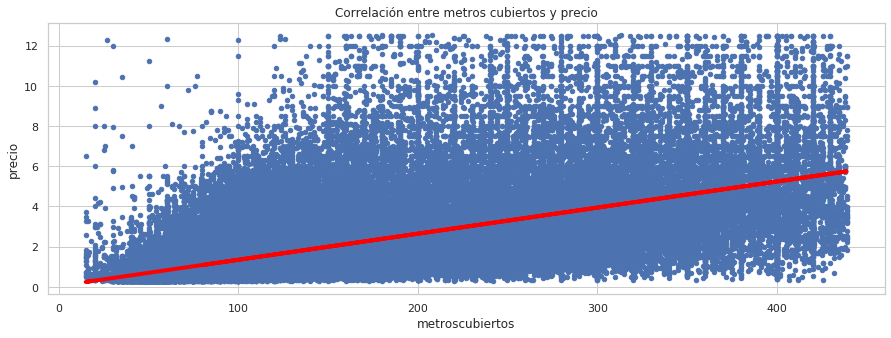

In [70]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
metros.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = metros[column]
y = metros['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), color='red', linewidth=4);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


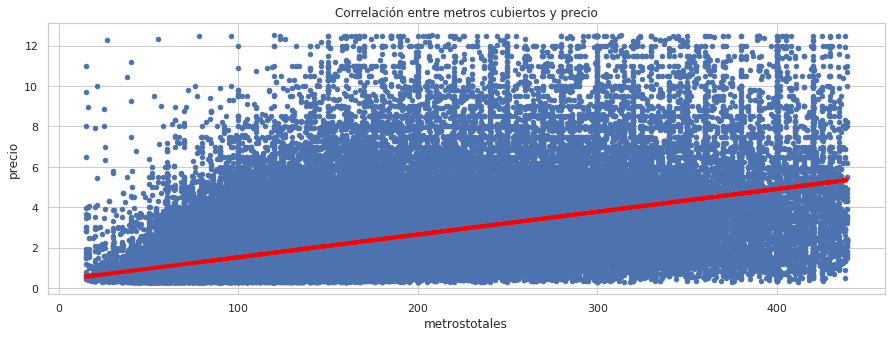

In [71]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metrostotales'

# Scatter plot
metros.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = metros[column]
y = metros['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), color='red', linewidth=4);

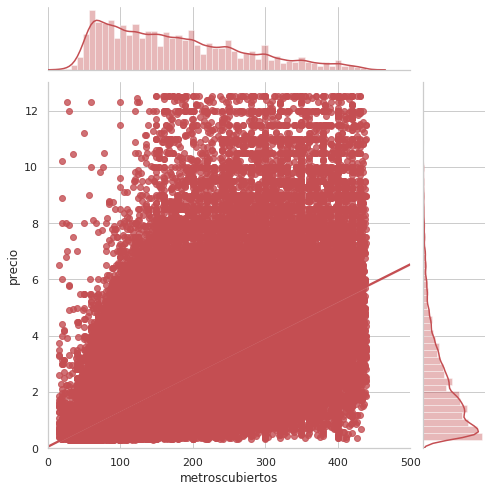

In [72]:
import seaborn as sns
sns.set(style="whitegrid")

g = sns.jointplot("metroscubiertos", "precio", data=metros, kind="reg",
                  xlim=(0, 500), ylim=(0, 13), color="r", height=7)

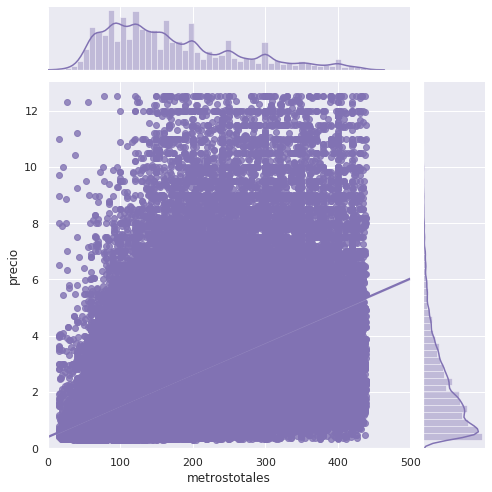

In [73]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("metrostotales", "precio", data=metros, kind="reg",
                  xlim=(0, 500), ylim=(0, 13), color="m", height=7)

In [74]:
metros_casas = metros[metros.tipodepropiedad == 'Casa']

metros_casas['anio'] = metros_casas['fecha'].dt.year
metros_casas = metros_casas[metros_casas['anio'] == 2016]
metros_casas = metros_casas[metros_casas['provincia'] == 'Distrito Federal']

/home/giacoconti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
print(len(metros_casas))

4107


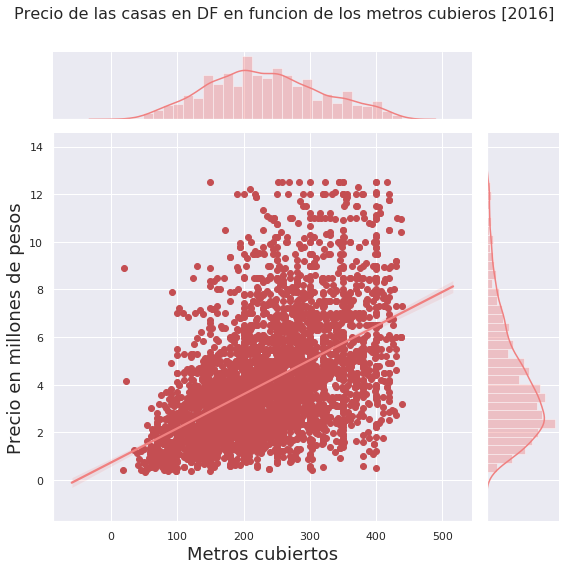

In [95]:
import seaborn as sns
sns.set(style="darkgrid")


g = sns.jointplot("metroscubiertos", "precio", data=metros_casas, kind="reg", scatter=False, color="lightcoral", height=8)

g.ax_joint.scatter("metroscubiertos", "precio", data=metros_casas, c="r")

plt.subplots_adjust(top=0.9)
plt.suptitle('Precio de las casas en DF en funcion de los metros cubieros [2016]', fontsize = 16)
plt.xlabel('Metros cubiertos', fontsize=18)
plt.ylabel('Precio en millones de pesos', fontsize=18)

plt.savefig("metroscubiertos.png")


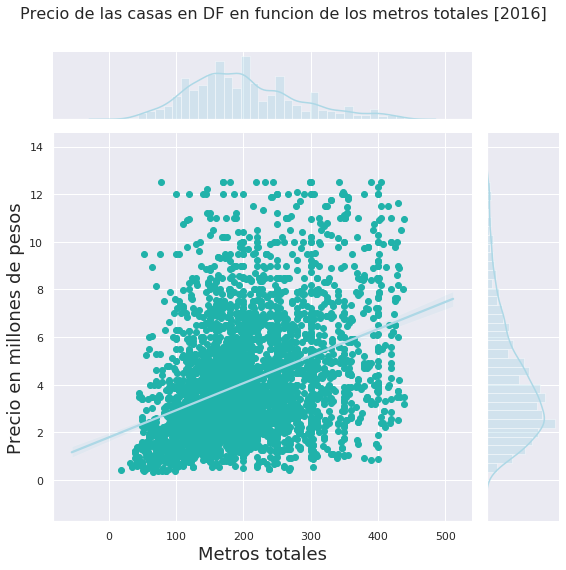

In [96]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("metrostotales", "precio", data=metros_casas, kind="reg", scatter=False, color="lightblue", height=8)
g.ax_joint.scatter("metrostotales", "precio", data=metros_casas, c="lightseagreen")


plt.subplots_adjust(top=0.9)
plt.suptitle('Precio de las casas en DF en funcion de los metros totales [2016]', fontsize = 16)

plt.xlabel('Metros totales', fontsize=18)
plt.ylabel('Precio en millones de pesos', fontsize=18)

plt.savefig("metrostotales.png")


In [85]:
#Vemos cuántos NaN hay por columna, sabiendo que el total es 240000
df.isnull().sum()

id                                0
titulo                         5387
descripcion                    1619
tipodepropiedad                  46
direccion                     53072
ciudad                          372
provincia                       155
antiguedad                    43555
habitaciones                  22471
garages                       37765
banos                         26221
metroscubiertos               17400
metrostotales                 51467
idzona                        28621
lat                               0
lng                               0
fecha                             0
gimnasio                          0
usosmultiples                     0
piscina                           0
escuelascercanas                  0
centroscomercialescercanos        0
precio                            0
dtype: int64

In [49]:
#Reemplazo los NaN por 0
df.loc[(df['lat']).isnull(),['lat']]=0
df.loc[(df['lng']).isnull(),['lng']]=0

In [50]:
df['lat'].isnull().sum()

0

In [51]:
df['lng'].isnull().sum()

0

In [52]:
df['lat'].value_counts()

0.000000     123936
23.063781         8
23.054936         7
19.314000         6
19.392000         6
19.391000         6
19.617000         6
19.393000         6
19.358000         6
19.489000         6
23.053672         6
19.558000         6
19.457000         6
19.410000         6
32.454473         5
23.068835         5
19.300000         5
19.332000         5
19.503000         5
19.369000         5
19.485000         5
19.388000         5
19.344000         5
19.350000         5
19.387000         5
19.437000         5
19.397000         5
19.478000         5
19.444000         5
19.494000         5
              ...  
17.094446         1
20.997915         1
19.591669         1
19.417518         1
19.727337         1
19.476194         1
19.359454         1
19.287115         1
18.987497         1
19.495689         1
20.662757         1
19.492759         1
20.743466         1
21.160287         1
19.433077         1
19.359921         1
19.361805         1
20.642669         1
24.009796         1


In [185]:
df['lng'].value_counts()

 0.000000      123937
-99.225000         12
-99.218984          9
-99.139000          8
-99.213000          8
-99.230000          8
-99.143540          7
-99.156000          7
-99.125000          7
-99.191000          7
-99.227000          7
-99.177446          7
-99.234000          7
-99.200000          7
-99.144000          7
-99.183676          7
-99.163000          7
-99.175000          6
-99.171909          6
-99.055727          6
-99.153000          6
-99.195000          6
-99.202366          6
-99.133163          6
-99.170000          6
-99.258000          6
-99.226000          6
-99.165000          6
-99.211000          6
-99.161000          6
                ...  
-100.976336         1
-103.439241         1
-103.464754         1
-96.191890          1
-99.303276          1
-116.761322         1
-106.117890         1
-99.007759          1
-98.941038          1
-100.369562         1
-102.311859         1
-99.156190          1
-99.136433          1
-100.102952         1
-100.42845

In [186]:
#Ahora cambio el tipo de dato de las columnas 'lat' y 'lng'
df['lat'] = df['lat'].astype(np.float32)
df['lng'] = df['lng'].astype(np.float32)

In [187]:
df['titulo'].value_counts()

casa en venta                                                                       468
departamento en venta                                                               289
casa en venta en chihuahua                                                          268
casa en venta en querétaro                                                          238
departamento en venta en benito juárez                                              221
departamento en venta en miguel hidalgo                                             177
casa en venta en mérida                                                             167
casa en venta                                                                       132
casa en venta en torreón                                                            119
casa en venta en monterrey                                                          115
casa en venta en mérida, yucatán                                                    115
casa en venta en puebla         

In [188]:
#Elimino los NaN
df.loc[(df['titulo']).isnull(), ['titulo']] = ''
df['titulo'] = df['titulo'].astype(str)

In [189]:
df['banos'].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [190]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['banos']).isnull(), ['banos']] = 0
df['banos'] = df['banos'].astype('category')

In [191]:
df['garages'].value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [69]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['garages']).isnull(), ['garages']] = 0
df['garages'] = df['garages'].astype('category')

In [70]:
df['direccion'].value_counts()

-                                                               660
.                                                               476
1                                                               212
Calle                                                           194
Norte de Mérida                                                 136
x #x                                                            122
0                                                               113
domicilio conocido                                              105
Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte          94
calle                                                            94
Juriquilla                                                       84
El Refugio                                                       78
x                                                                77
Metepec                                                          77
CENTRO                                          

In [77]:
#Limpio las direcciones que no son calles

df.loc[(df['direccion']).isnull(), ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'S/N', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Sin nombre', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '0', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '--', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '...', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '-', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '.', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x #x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '1', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'X', ['direccion']] = 'S/D'

In [76]:
df['direccion'] = df['direccion'].astype('str')